# Latar Belakang
The New York City Taxi and Limousine Commission (TLC), yang didirikan pada tahun 1971, merupakan lembaga yang bertanggung jawab atas perizinan dan pengaturan taksi, kendaraan sewaan (warna berbasis komunitas, mobil hitam, dan limusin mewah) , van komuter, dan kendaraan paratransit yang terdapat di kota New York. Dewan Komisi terdiri dari sembilan anggota, delapan di antaranya merupakan Komisaris. Ketua/Komisaris memimpin rapat komisi publik yang dijadwalkan secara rutin dan merupakan kepala lembaga, yang memiliki sekitar 600 karyawan TLC.

Hal yang saya lakukan dalam analisis adalah untuk menemukan beberapa temuan / insight yang dapat saya lihat dari dataset dan mengubahnya menjadi Visualisasi Data agar dapat mudah dipahami dan bisa dijadikan keputusan oleh para dewan / *board member*.



## Pernyataan Masalah

Berdasarkan masalah umum yang ditemukan dari perusahaan pengaturan taksi yang berdasarkan *Research Question* “Bagaimana NYC Taxi & Limousine Commission (TLC) dapat mengoptimalkan layanan taksi dengan memaksimalkan pendapatan, efisiensi operasional, dan kepuasan pelanggan melalui Data Analysis?”
Berikut ini dapat diuraikan menjadi *Business Questions* yang antara lain adalah:

- Puncak Permintaan Layanan Taksi 
- Distribusi terhadap Durasi Perjalanan 
- Pola Perjalanan 
- Distribusi jumlah penumpang per perjalanan
- Faktor utama yang mempengaruhi besaran tarif total



## Tujuan

Tujuan Analisis yang saya lakukan pada proyek ini adalah untuk memberikan rekomendasi berupa strategi bagi TLC dalam mengoptimalkan pelayanan taksi.

# Data

Berikut adalah informasi dataset pada tiap kolomnya antara lain adalah :

- VendorID: Kode yang menunjukkan penyedia LPEP yang menyediakan catatan. 1 = Creative Mobile Technologies, LLC. ;  2 = VeriFone Inc.
- lpep_pickup_datetime: Tanggal dan waktu saat meteran diaktifkan saat menaikkan penumpang.
- lpep_dropoff_datetime: Tanggal dan waktu saat meteran dinonaktifkan setelah menurunkan penumpang.
- Passenger_count: Jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan oleh driver.
- Trip_distance: Jarak perjalanan yang telah berlalu dalam satuan mile dicatatkan dengan Argometer.
- PULocationID: Zona Taksi TLC di mana Argometer digunakan saat menaikkan penumpang.
- DOLocationID: Zona Taksi TLC di mana Argometer dimatikan saat menurunkan penumpang.
- RateCodeID: Kode tarif akhir berlaku pada akhir perjalanan. 1 = Tarif standar ;  2 =JFK ;  3 = Taman Baru ;  4 =Nassau atau Westchester ; 5 = Tarif Borongan ; 6 = Perjalanan berkelompok

- Store_and_fwd_flag: Bendera ini menunjukkan apakah rekor perjalanan telah dipegang dalam memori kendaraan sebelum dikirim ke vendor, alias “simpan dan teruskan”, karena kendaraan melakukannyatidak memiliki koneksi ke server.
Y = menyimpan dan meneruskan perjalanan
N = bukan perjalanan simpan dan maju




In [4]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Menampilkan Dataset yang akan digunakan

df = pd.read_csv('NYC TLC Trip Record.csv')
df

C:\Users\Herry Rangkuti\AppData\Local\Temp\ipykernel_15300\915240392.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

## Data Understanding and Cleaning
Sebelum melakukan analisis data, Diperlukan melakukan *Data Understanding and Cleaning*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.



In [3]:
# Melihat Missing Values pada Dataset

df.isna().sum()/len(df)*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [4]:
# Menghapus duplikasi yang terdapat di Dataset

df = df.drop_duplicates()

In [5]:
# Menghapus baris dengan nilai yang hilang (NaN) di kolom penting

df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df=df.dropna(subset = ['store_and_fwd_flag'])


In [6]:
# Menghapus baris yang tidak dapat diubah menjadi datetime

df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])

In [7]:
# Mengonversi kolom datetime ke format datetime Pandas

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce' )
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors = 'coerce' )


In [8]:
# Mengisi nilai hilang pada kolom numerik dengan 0

numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(0)


In [9]:
# Mengonversi kolom kategori ke tipe data kategori

df['VendorID'] = df['VendorID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['trip_type'] = df['trip_type'].astype('category')


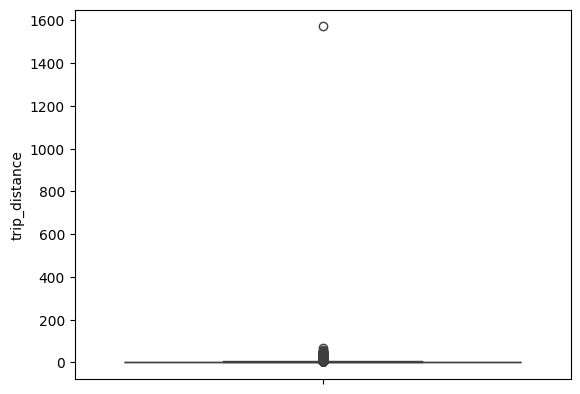

In [10]:
# Mengecek Outliers pada kolom "trip_distance"

sns.boxplot(df["trip_distance"])
plt.show()

# Kesimpulan : Outliers di 1600 perlu dihapus

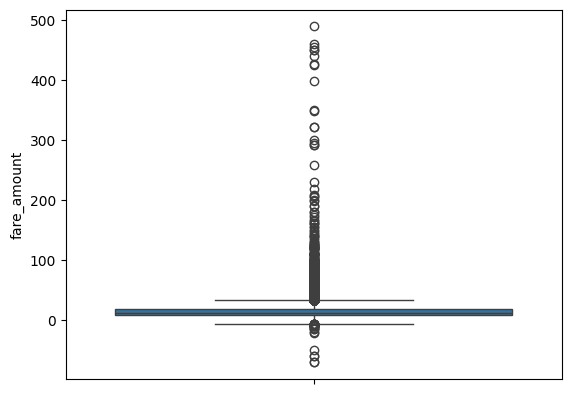

In [11]:
# Mengecek Outliers pada kolom "fare_amount"
sns.boxplot(df["fare_amount"])
plt.show()

# Kesimpulan : Outliers tidak perlu dihapus karena masih berhimpitan

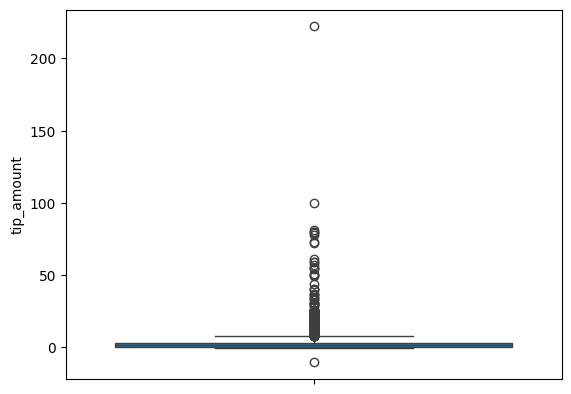

In [12]:
# Mengecek Outliers pada kolom "tip_amount"

sns.boxplot(df["tip_amount"])
plt.show()

# Kesimpulan : Outliers > 200 perlu dihapus

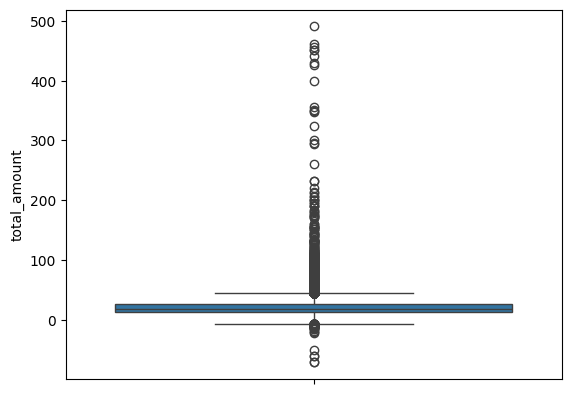

In [13]:
# Mengecek Outliers pada kolom "total_amount"

sns.boxplot(df["total_amount"])
plt.show()

# Kesimpulan : Outliers tidak perlu dihapus karena masih berhimpitan

In [14]:
# Menghapus Outliers yang terdapat pada kolom "trip_distance" , tip_amount

df = df[(df['trip_distance'] <= 1500) & (df['tip_amount'] < 200)]


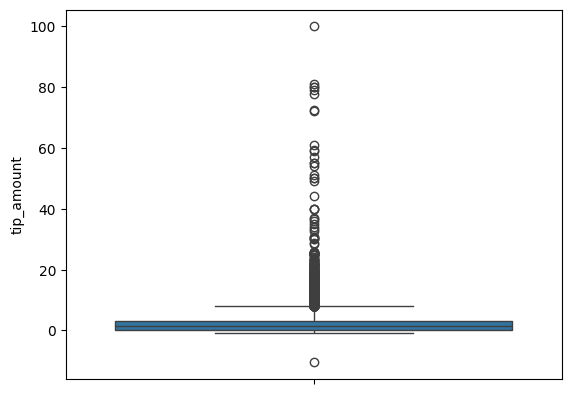

In [15]:
# Mengecek Outliers yang telah dihapus
sns.boxplot(df["tip_amount"])
plt.show()


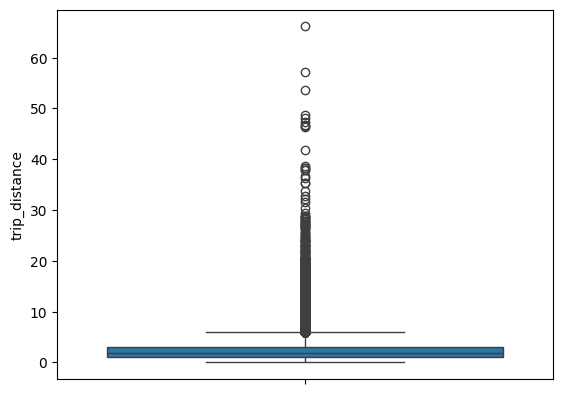

In [16]:
# Mengecek Outliers yang telah dihapus
sns.boxplot(df["trip_distance"])
plt.show()

In [17]:
# Menghapus kembali outlier nya karena masih ada yang jauh jaraknya

df = df[(df['trip_distance'] <= 60) & (df['tip_amount'] < 100)]


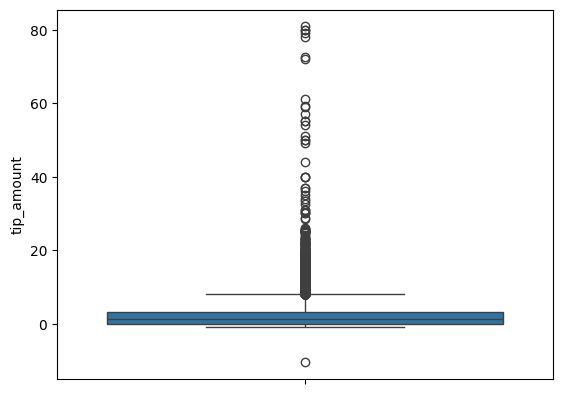

In [18]:
# Mengecek Outliers yang telah dihapus (2)
sns.boxplot(df["tip_amount"])
plt.show()

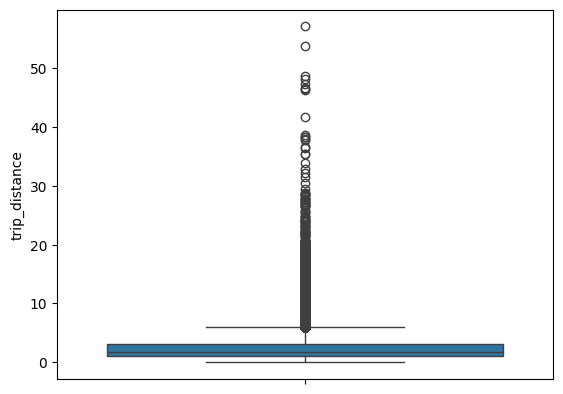

In [19]:
# Mengecek Outliers yang telah dihapus
sns.boxplot(df["trip_distance"])
plt.show()

In [20]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,0.0,1.0,22.50,1.0,1.0,2.75


In [21]:
# Drop Kolom "ehail_fee" karena value nya hanya 0 

df.drop(columns=['ehail_fee'], inplace=True)

In [22]:
# Menampilkan Data yang telah dibersihkan
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [23]:
# Missing Values sudah tidak ada sama sekali

df.isna().sum()/len(df)*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [24]:
# Men save data yang sudah di cleaned untuk persiapan data visualisasi di Tableau
df.to_csv('cleaned_data_TLC.csv', index=False)


# Data Analysis

Setelah melakukan tahap _data understanding and cleaning_. Sekarang, kita dapat melakukan *data analysis* untuk mengetahui permasalahan serta analisa rekomendasi untuk mengatasi permasalahan tersebut.  

Analisis dilakukan dengan melihat permasalahan yang disebutkan diatas antara lain:

- Puncak Permintaan Layanan Taksi 
- Distribusi terhadap Durasi Perjalanan 
- Pola Perjalanan 
- Distribusi jumlah penumpang per perjalanan
- Faktor utama yang mempengaruhi besaran tarif total

Dan adapun temuan lain diluar dari *business question* yang juga dapat membantu permasalahan utama tersebut.

## 1. Grafik Permintaan Layanan Taksi Berdasarkan Jam

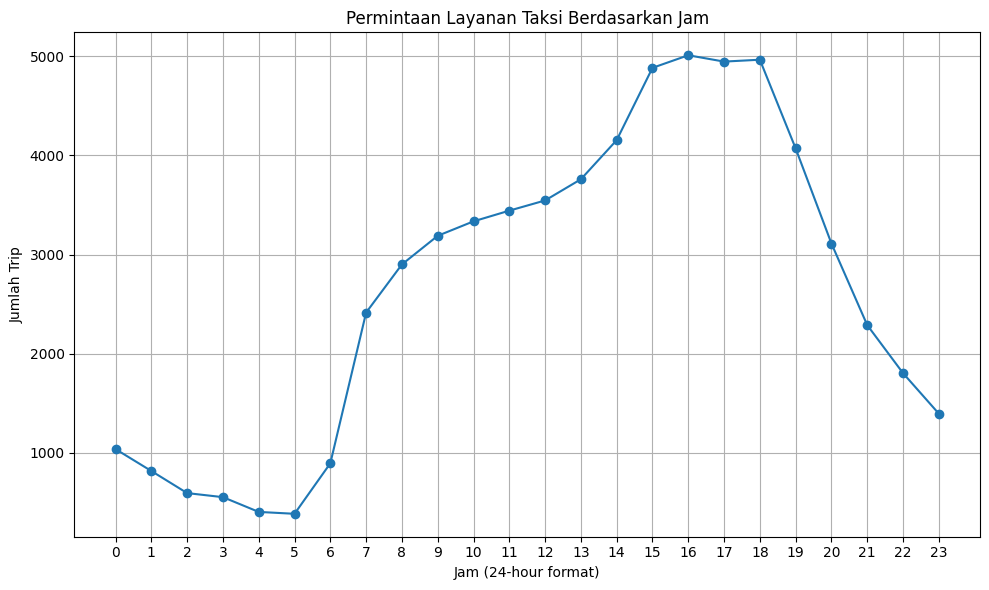

In [25]:
 

# Menghitung permintaan layanan berdasarkan jam pickup
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
hourly_demand = df['pickup_hour'].value_counts().sort_index()

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(hourly_demand.index, hourly_demand.values, marker='o')
plt.title("Permintaan Layanan Taksi Berdasarkan Jam")
plt.xlabel("Jam (24-hour format)")
plt.ylabel("Jumlah Trip")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Berdasarkan hasil dari grafik diatas, Analisis permintaan perjalanan per jam menunjukkan permintaan tertinggi biasanya terjadi pada sore hari (14.00-18.00).

Rekomendasi:
Alokasikan lebih banyak pengemudi selama jam sibuk untuk memaksimalkan pendapatan.



## 2. Histogram Distribusi Durasi Perjalanan

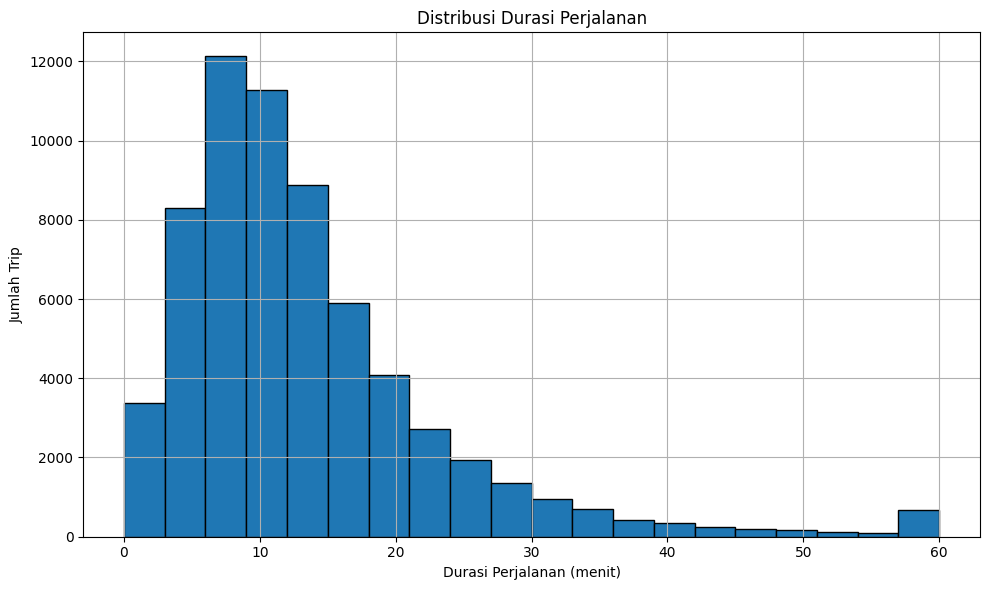

In [26]:

# Durasi perjalanan dalam menit
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
trip_duration_dist = df['trip_duration'].clip(upper=60)  # Batasi durasi pada 60 menit

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(trip_duration_dist, bins=20, edgecolor='black')
plt.title("Distribusi Durasi Perjalanan")
plt.xlabel("Durasi Perjalanan (menit)")
plt.ylabel("Jumlah Trip")
plt.grid(True)
plt.tight_layout()
plt.show()





Analisa:
Sebagian besar perjalanan berlangsung kurang dari 30 menit. Analisa ini membantu untuk perencanaan terhadap ketersediaan armada berdasarkan lama perjalanan pada umumnya.

Rekomendasi:
Optimalkan harga dan alokasi armada untuk perjalanan jarak pendek (sekitar 30 menit).


## 3. Grafik Pendapatan Harian

C:\Users\Herry Rangkuti\AppData\Local\Temp\ipykernel_21680\174762408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['pickup_date'] = df_2023['lpep_pickup_datetime'].dt.date


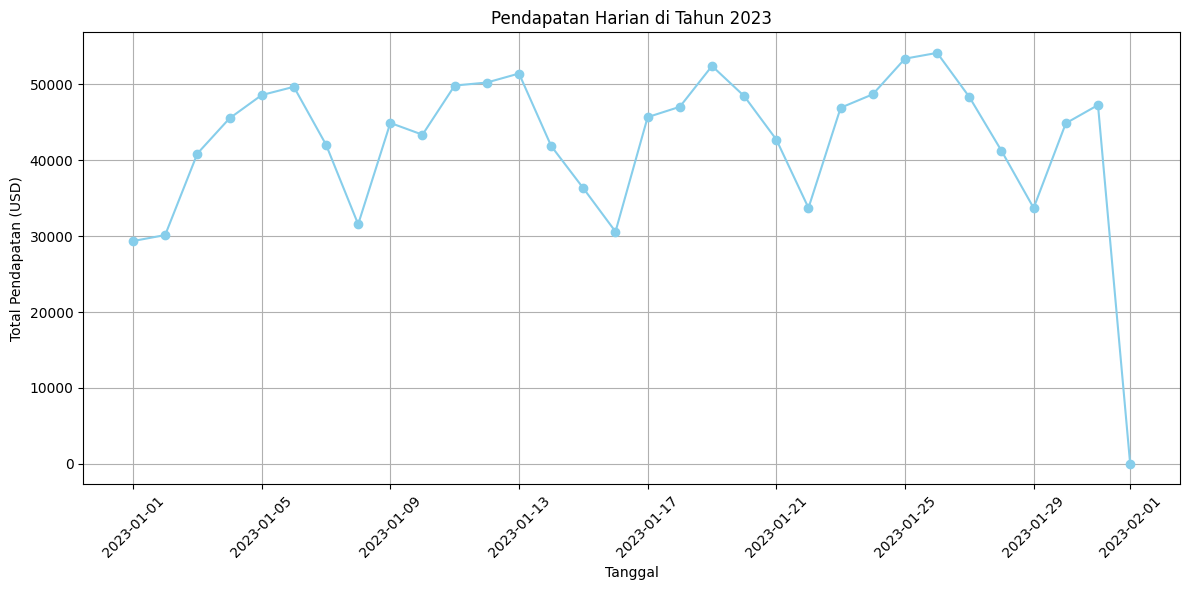

In [27]:


df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')


df_2023 = df[df['lpep_pickup_datetime'].dt.year == 2023]


df_2023['pickup_date'] = df_2023['lpep_pickup_datetime'].dt.date
daily_revenue_2023 = df_2023.groupby('pickup_date')['total_amount'].sum()

# Plot daily revenue
plt.figure(figsize=(12, 6))
daily_revenue_2023.plot(kind='line', color='skyblue', marker='o')
plt.title("Pendapatan Harian di Tahun 2023")
plt.xlabel("Tanggal")
plt.ylabel("Total Pendapatan (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Analisa:
Pola pendapatan harian menunjukkan fluktuatif yang bisa saja terjadi dikarenakan pada hal-hal terentu yang berkaitan dengan event atau hari libur.

Rekomendasi:
Tingkatkan upaya berupa promosi pada hari-hari dengan permintaan yang lebih rendah untuk meningkatkan pendapatan.


## 4. Barplot Distribusi Jumlah Penumpang per Trip



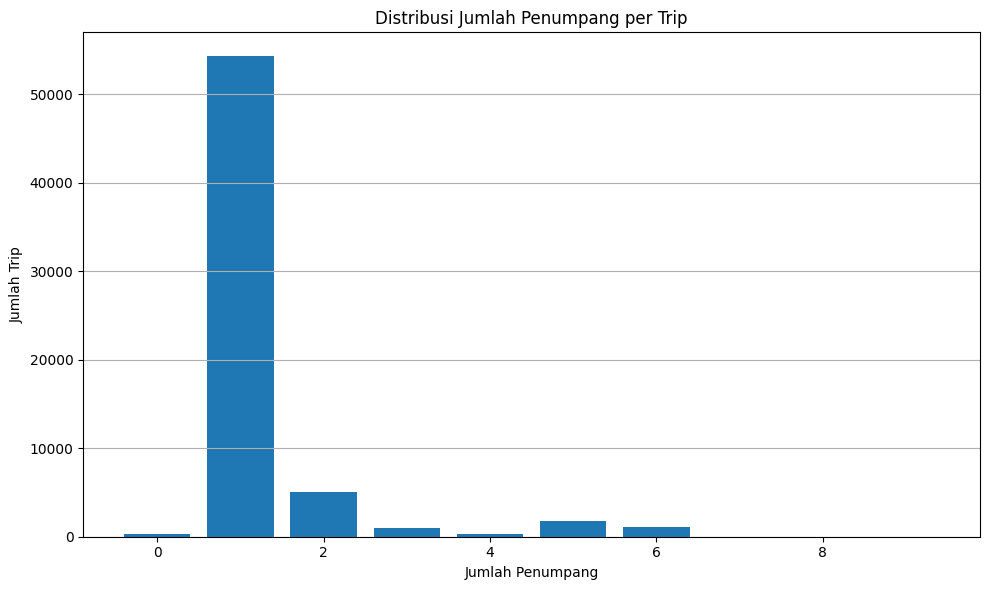

In [28]:
# Distribusi jumlah penumpang
passenger_count_dist = df['passenger_count'].value_counts().sort_index()

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(passenger_count_dist.index, passenger_count_dist.values)
plt.title("Distribusi Jumlah Penumpang per Trip")
plt.xlabel("Jumlah Penumpang")
plt.ylabel("Jumlah Trip")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Analisa:
Sebagian besar perjalanan memiliki 1-2 penumpang, hal ini menunjukkan bahwa perjalanan bersama tidaklah dominan.

Rekomendasi:
Pertimbangkan untuk memperkenalkan lebih banyak opsi seperti shared ride untuk mengoptimalkan muatan penumpang pada kendaraan yang dipakai.


## 5. Barplot Korelasi Faktor-faktor dengan Total Amount



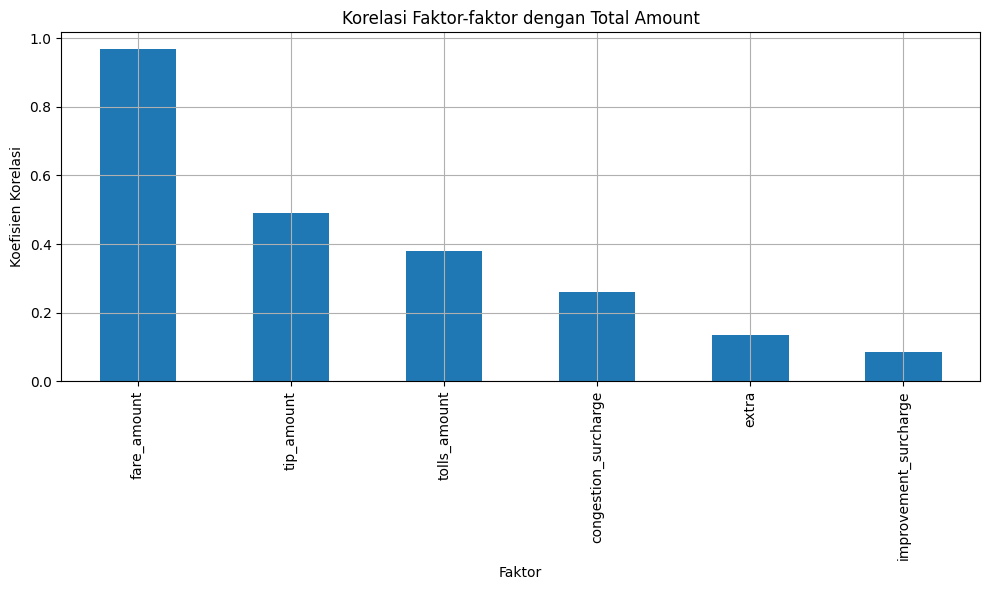

In [29]:
# Korelasi faktor-faktor dengan total_amount
correlation_matrix = df[['fare_amount', 'tip_amount', 'extra', 'tolls_amount', 
                         'improvement_surcharge', 'congestion_surcharge', 'total_amount']].corr()
correlation_with_total = correlation_matrix['total_amount'].drop('total_amount').sort_values(ascending=False)

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
correlation_with_total.plot(kind='bar')
plt.title("Korelasi Faktor-faktor dengan Total Amount")
plt.xlabel("Faktor")
plt.ylabel("Koefisien Korelasi")
plt.grid(True)
plt.tight_layout()
plt.show()

Analisis:
Faktor utama yang mempengaruhi total tarif meliputi jumlah tarif dan jumlah tip.

Rekomendasi:
Pertimbangkan penyesuaian tarif dan pemberian tip insentif untuk mengoptimalkan pendapatan.


## Insight Tambahan

Rekomendasi Opsional dengan menggunakan data visualisasi menggunakan aplikasi lain yaitu Tableau


## 6. Top 10 Pick-Up Zones

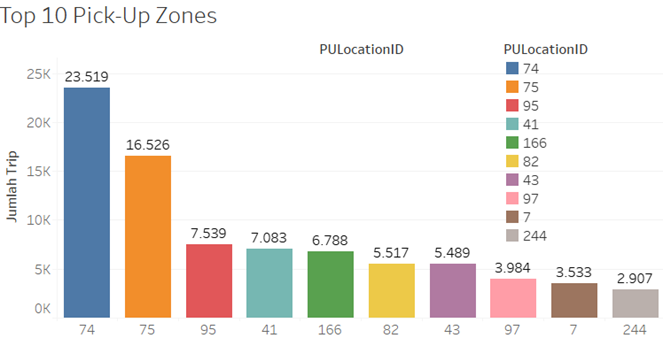

Analisa:
Zona Penjemputan Berada di Lokasi Terbanyak terdapat pada zona 74, 75, 95, 41, 166, 82, 43, 97, 7, 244

Rekomendasi:
Alokasi Sumber Daya di Area dengan Permintaan Tinggi serta Mempromosikan Layanan di Area yang Kurang Dikenal: Untuk zona dengan permintaan rendah, pertimbangkan untuk menawarkan promosi atau diskon untuk mendorong lebih banyak perjalanan dari area ini. Hal ini dapat membantu mendistribusikan permintaan secara lebih merata di seluruh wilayah.


## 7. Top 10 Drop-Up Zones

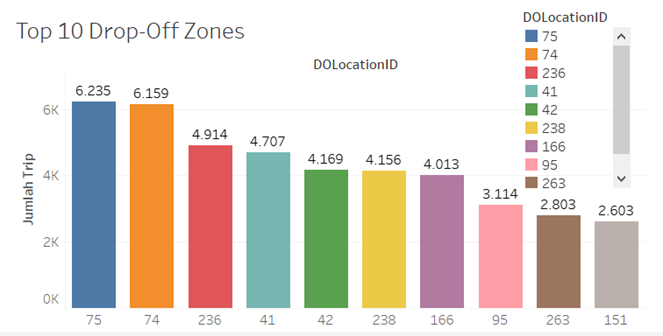

Analisa:
Zona Drop-Off Berada di Lokasi Terbanyak terdapat pada zona 75, 74, 236, 41, 42, 238, 166, 95, 263, 151

Target Pemasaran di Zona Drop-Off Populer: Pertimbangkan pemasaran bertarget untuk perjalanan pulang pergi, sehingga mendorong pengguna untuk memesan tumpangan kembali ke lokasi awal mereka. Ada Kesamaan dari zona pickup dan drop off yakni di zona 75,74,41,166. 


## 8. Top Payment

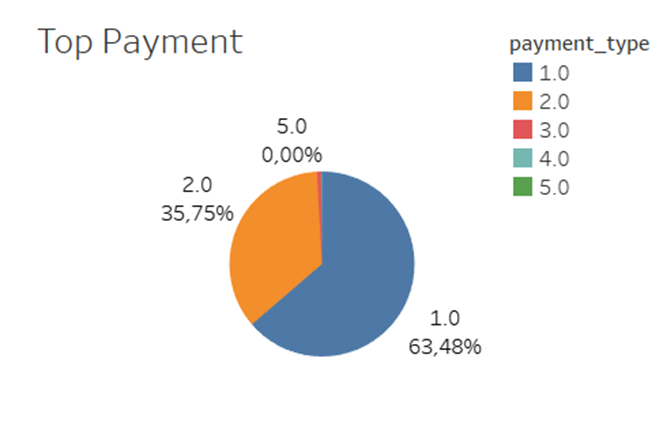

Analisa:
Data menunjukkan bahwa Pembayaran terbanyak dilakukan oleh credit-card (1.0) sebanyak 63,48% dan terbanyak kedua adalah cash (2.0) sebanyak 35,75%.

Rekomendasi: Pertimbangkan untuk melakukan promosi-promosi pembayaran terkait credit-card dengan bekerja sama oleh pihak bank, lalu untuk cash dapat dilakukan promosi dengan menggunakan kupon berbentuk fisik.


# Rekomendasi

Berdasarkan hasil analisa data, berikut adalah beberapa rekomendasi yang dapat digunakan oleh pihak terkait untuk meningkatkan efisiensi dan pendapatan layanan taksi NYC TLC:

## Optimalisasi Pengaturan Sumber Daya Berdasarkan Permintaan

Rekomendasi: Menambah jumlah taksi pada waktu-waktu dengan demand tinggi, terutama di sore hari (14.00-18.00).

Alasan: Analisis menunjukkan adanya pola permintaan tinggi pada jam tertentu, terutama pada jam pulang kerja. Dengan menempatkan lebih banyak pengemudi di jam-jam ini, perusahaan dapat memaksimalkan jumlah trip dan pendapatan.


## Fokus pada Tarif dan Insentif untuk Meningkatkan Pendapatan

Rekomendasi: Mengkaji ulang struktur tarif dan insentif bagi pengemudi, seperti tarif tetap untuk perjalanan singkat dan program insentif bagi pengemudi dengan layanan terbaik.

Alasan: Analisis korelasi menunjukkan bahwa faktor utama yang mempengaruhi pendapatan adalah tarif dasar dan tip. Dengan memberikan insentif pada tarif dan tip, perusahaan dapat menarik lebih banyak pengemudi untuk meningkatkan pendapatan keseluruhan.


## Pengembangan Layanan untuk Trip Berdurasi Pendek

Rekomendasi: Menawarkan paket harga atau opsi layanan untuk perjalanan singkat, seperti dalam radius tertentu.

Alasan: Distribusi durasi trip menunjukkan bahwa sebagian besar perjalanan berdurasi singkat. Dengan fokus pada layanan untuk perjalanan pendek, perusahaan dapat meningkatkan kepuasan pelanggan dan penggunaan armada secara lebih efektif.


## Promosi pada Hari dengan Permintaan Rendah untuk Meningkatkan Pendapatan Harian

Rekomendasi: Meningkatkan promosi pada hari-hari dengan permintaan rendah atau meluncurkan penawaran spesial di hari-hari tersebut.

Alasan: Pola pendapatan harian menunjukkan fluktuasi yang dipengaruhi oleh faktor eksternal seperti cuaca, acara, atau hari libur. Promosi yang strategis pada hari-hari tertentu dapat membantu menstabilkan pendapatan.


## Pertimbangkan Layanan Berbagi Kendaraan (Ride-Sharing)

Rekomendasi: Mengembangkan layanan berbagi kendaraan untuk memanfaatkan armada lebih efisien, terutama pada waktu-waktu permintaan saat rendah.

Alasan: Sebagian besar trip diisi oleh satu atau dua penumpang, yang menunjukkan potensi untuk meningkatkan efisiensi dengan layanan berbagi kendaraan agar muatan penumpang dalam satu kendaraan menjadi maksimal.


## Pengembangan Sistem Prediksi Permintaan Berdasarkan Data-Data Sebelumnya

Rekomendasi: Menggunakan data-data sebelumnya untuk memprediksi pola permintaan musiman dan harian, sehingga perusahaan dapat melakukan perencanaan yang lebih akurat.

Alasan: Analisis pola musiman dan harian menunjukkan adanya fluktuasi permintaan. Dengan sistem prediksi, perusahaan dapat mengantisipasi kebutuhan pengemudi dan armada sesuai dengan pola permintaan.


# Kesimpulan

Dengan strategi yang lebih adaptif berdasarkan data, NYC TLC dapat meningkatkan pendapatan melalui optimalisasi sumber daya, tarif, promosi, dan layanan.

Langkah-langkah ini tidak hanya  meningkatkan efisiensi operasional, tetapi juga dapat meningkatkan kepuasan pelanggan  dan competitive advantage perusahaan di pasar yang serupa.
